In [1]:
import xarray as xr 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import glob
import seaborn as sns 
import os
from matplotlib.colors import to_hex
from pathlib import Path
import sys

project_root = Path.cwd().parents[0]
sys.path.append(str(project_root))

from utils.plotting import create_figure, palette, colorwheel, customize_axis, get_figure_dimensions
from utils.bathymetry import generate_bathymetry
from utils.config import load_config, default_params
from utils.io import read_raw_output
from utils.grid import prepare_dsH, interp_ds, depth_following_grid

In [2]:
dsO = xr.open_dataset("/itf-fi-ml/home/alsjur/temporal-topo-flow/slope/input/slope-200_forcing.nc")
dsN = xr.open_dataset("/itf-fi-ml/home/alsjur/temporal-topo-flow/input/forcing/short_nobumps_crosswind_forcing.nc")

In [3]:
dsN

<xarray.Dataset>
Dimensions:    (time: 1536, y: 90, x: 90)
Coordinates:
  * time       (time) float64 0.0 1.08e+04 2.16e+04 ... 1.657e+07 1.658e+07
  * x          (x) float64 500.0 1.5e+03 2.5e+03 ... 8.75e+04 8.85e+04 8.95e+04
  * y          (y) float64 500.0 1.5e+03 2.5e+03 ... 8.75e+04 8.85e+04 8.95e+04
Data variables:
    forcing_x  (time, y, x) float64 ...
    forcing_y  (time, y, x) float64 ...
    dh_dx      (y, x) float64 ...
    dh_dy      (y, x) float64 ...
    h          (y, x) float64 ...

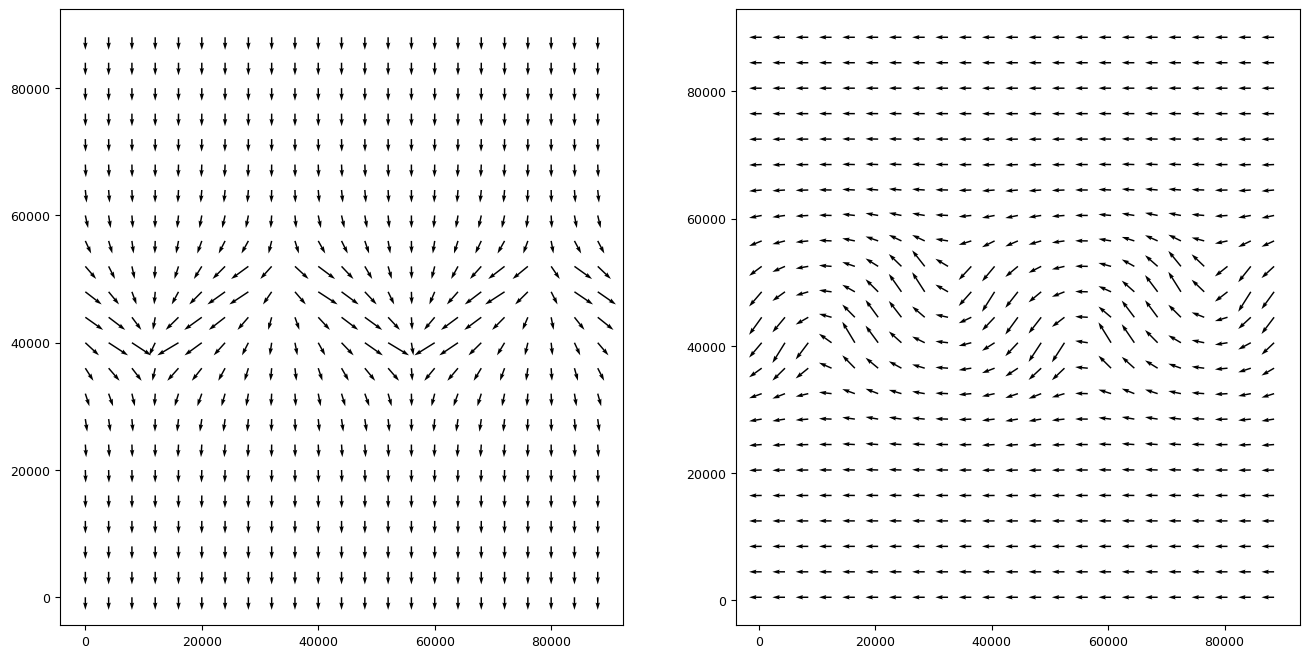

In [9]:
time = 28*8
step = 4
dssO = dsO.isel(time=time)
dssN = dsN.isel(time=time)


fig, [axl, axr] = plt.subplots(figsize=(16,8),ncols=2)

axl.quiver(dssO.x.values[::step], dssO.y.values[::step], dssO.forcing_x.values[::step,::step],dssO.forcing_y.values[::step,::step])
axr.quiver(dssN.x.values[::step], dssN.y.values[::step], dssN.forcing_x.values[::step,::step],dssN.forcing_y.values[::step,::step])